In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore", message="`distplot` is a deprecated function")

In [2]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [3]:
CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = './../data/welfare_python.csv'

In [4]:
welfare = pd.read_csv(filename, encoding = 'utf-8')
welfare.columns

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')

In [5]:
welfare.loc[welfare['gender'] == 1, ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2, ['gender']] = '여성'

thisyear = 2026
welfare['age'] = thisyear - welfare['birth'] + 1

In [6]:
def setMarriage(x) :
    if x == 1 :
        return '결혼'
    elif x == 2 :
        return '이혼'
    else :
        return '무응답'

welfare['marriage'] = welfare['marriage'].apply(setMarriage)

In [7]:
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()
sum(welfare['income'].isnull())

0

In [8]:
def setReligion_txt(x) :
    if int(x) == 1 :
        return '있음'
    else :
        return '없음'

In [9]:
# unique() 함수로 어떤 값인지 확인
welfare['religion'].unique()

array([2, 1])

In [10]:
welfare['religion'] = welfare['religion'].apply(setReligion_txt)

In [11]:
job_file = './../data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding = 'cp949')

welfare['code_job'].unique()

array([  nan,  942.,  762.,  530.,  999.,  312.,  254.,  510.,  286.,
        521.,  773.,  314.,  941.,  951.,  274.,  873.,  320.,  952.,
        151.,  152.,  772.,  852.,  442.,  991.,  422.,  313.,  710.,
        522.,  399.,  753.,  851.,  235.,  231.,  311.,  721.,  953.,
        930.,  863.,  910.,  392.,  761.,  922.,  285.,  875.,  862.,
        421.,  243.,  223.,  252.,  259.,  771.,  135.,  245.,  221.,
        751.,  251.,  141.,  722.,  246.,  289.,  281.,  741.,  261.,
        247.,  441.,  864.,  222.,  411.,  799.,  743.,  780.,  149.,
        891.,  823.,  159.,  248.,  874.,  892.,  241.,  239.,  791.,
        271.,  871.,  391.,  620.,  131.,  431.,  811.,  272.,  429.,
        213.,  842.,  283.,  284.,  134.,  611.,  236.,  792.,  855.,
        234.,  861.,  921.,  253.,  752.,  841.,  330.,  233.,  899.,
        139.,  432.,  212.,  423.,  730.,  273.,  211.,  412.,  120.,
        992.,  854.,  822.,  831.,  853.,  832.,  612.,  821.,  613.,
        774.,  132.,

In [12]:
welfare = pd.merge(welfare, jobframe, on = 'code_job')
welfare

,gender,birth,marriage,religion,code_job,income,code_religion,age,job
0,남성,1948,이혼,없음,942.0,120.000000,1,79,경비원 및 검표원
1,남성,1942,무응답,있음,762.0,200.000000,1,85,전기공
2,남성,1962,결혼,있음,530.0,241.619016,1,65,방문 노점 및 통신 판매 관련 종사자
3,남성,1962,무응답,없음,999.0,40.000000,1,65,기타 서비스관련 단순 종사원
4,남성,1978,결혼,없음,312.0,350.000000,1,49,경영관련 사무원
...,...,...,...,...,...,...,...,...,...
7524,여성,1934,결혼,없음,611.0,241.619016,6,93,작물재배 종사자
7525,남성,1956,결혼,없음,743.0,187.660000,6,71,용접원
7526,여성,1958,결혼,있음,611.0,241.619016,6,69,작물재배 종사자
7527,남성,1967,결혼,있음,874.0,241.619016,5,60,물품이동 장비 조작원


In [13]:
welfare['code_religion'].unique()

array([1, 7, 2, 5, 6, 3, 4])

In [14]:
def setReligion_txt(x) :
    if int(x) == 1 :
        return '서울'
    elif int(x) == 2 :
        return '수도권'
    elif int(x) == 3 :
        return '부산/경남/울산'
    elif int(x) == 4 :
        return '대구/경북'
    elif int(x) == 5 :
        return '대전/충남'
    elif int(x) == 6 :
        return '강원/충북'
    elif int(x) == 7 :
        return '광주/전남/전북/제주도'

In [15]:
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)
welfare

,gender,birth,marriage,religion,code_job,income,code_religion,age,job
0,남성,1948,이혼,없음,942.0,120.000000,서울,79,경비원 및 검표원
1,남성,1942,무응답,있음,762.0,200.000000,서울,85,전기공
2,남성,1962,결혼,있음,530.0,241.619016,서울,65,방문 노점 및 통신 판매 관련 종사자
3,남성,1962,무응답,없음,999.0,40.000000,서울,65,기타 서비스관련 단순 종사원
4,남성,1978,결혼,없음,312.0,350.000000,서울,49,경영관련 사무원
...,...,...,...,...,...,...,...,...,...
7524,여성,1934,결혼,없음,611.0,241.619016,강원/충북,93,작물재배 종사자
7525,남성,1956,결혼,없음,743.0,187.660000,강원/충북,71,용접원
7526,여성,1958,결혼,있음,611.0,241.619016,강원/충북,69,작물재배 종사자
7527,남성,1967,결혼,있음,874.0,241.619016,대전/충남,60,물품이동 장비 조작원


In [16]:
def newAge(x) :
    if x < 30 :
        return '청년'
    elif 30 <= x < 60:
        return '중년'
    else :
        return '노년'

In [17]:
welfare['ageg'] = welfare['age'].apply(newAge)
welfare[['age', 'ageg']].head()

,age,ageg
0,79,노년
1,85,노년
2,65,노년
3,65,노년
4,49,중년


In [18]:
col_mapping = {'gender' : '성별', 'birth' : '생일', 'marriage' : '결혼 유무', 'religion' : '종교 유무', 'code_job' : '직업 코드', 'income' : '소득', 'code_religion' : '지역구', 'age' : '나이', 'job' : '직업', 'ageg' : '연령대'}

welfare = welfare.rename(columns = col_mapping)
welfare.to_csv('welfareClean.csv', index = False, encoding = 'cp949')

welfare.head(10)

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대
0,남성,1948,이혼,없음,942.0,120.000000,서울,79,경비원 및 검표원,노년
1,남성,1942,무응답,있음,762.0,200.000000,서울,85,전기공,노년
2,남성,1962,결혼,있음,530.0,241.619016,서울,65,방문 노점 및 통신 판매 관련 종사자,노년
3,남성,1962,무응답,없음,999.0,40.000000,서울,65,기타 서비스관련 단순 종사원,노년
4,남성,1978,결혼,없음,312.0,350.000000,서울,49,경영관련 사무원,중년
5,여성,1975,결혼,없음,254.0,200.000000,서울,52,문리 기술 및 예능 강사,중년
6,여성,1942,결혼,있음,510.0,150.000000,서울,85,영업 종사자,노년
7,남성,1964,무응답,없음,530.0,241.619016,서울,63,방문 노점 및 통신 판매 관련 종사자,노년
8,남성,1975,무응답,있음,286.0,241.619016,서울,52,스포츠 및 레크레이션 관련 전문가,중년
9,남성,1978,결혼,없음,521.0,241.619016,서울,49,매장 판매 종사자,중년


In [19]:
def FileSave() :
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

In [20]:
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
result

결혼 유무
결혼     5307
무응답    1689
이혼      533
Name: 결혼 유무, dtype: int64

seabornWelfare_01.png파일이 저장되었습니다.


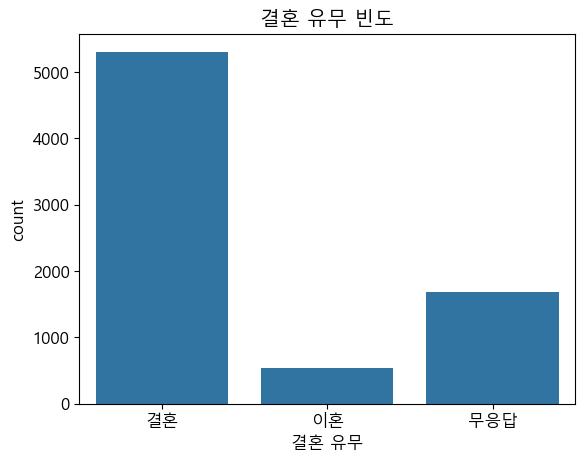

In [21]:
ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')
sns.countplot(x = '결혼 유무', data = welfare, order = ORDERING)
FileSave()

In [22]:
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
result

결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        984
       있음        705
이혼     없음        195
       있음        338
Name: 결혼 유무, dtype: int64

seabornWelfare_02.png파일이 저장되었습니다.


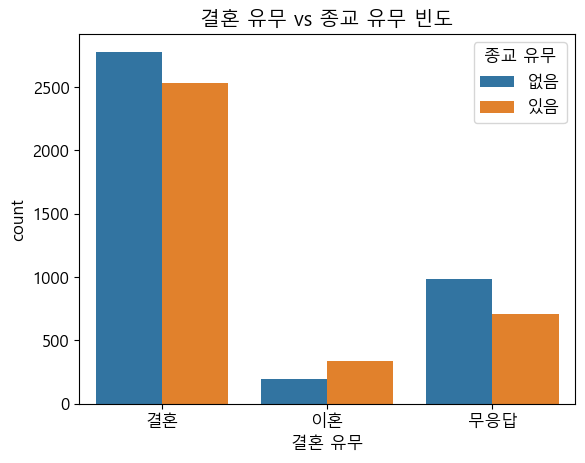

In [23]:
plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')

sns.countplot(x = '결혼 유무', hue = '종교 유무', data = welfare, order = ORDERING)
FileSave()

seabornWelfare_03.png파일이 저장되었습니다.


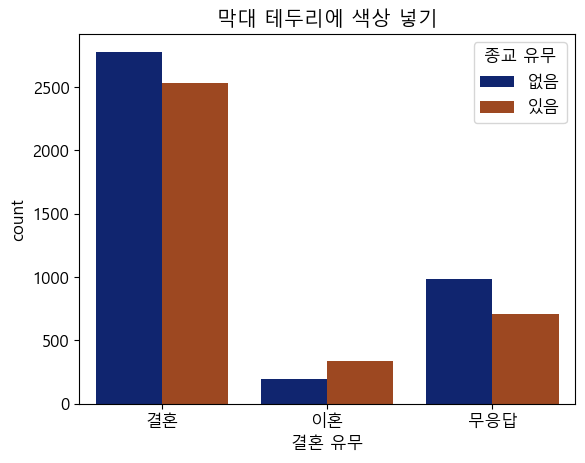

In [24]:
plt.figure()
plt.title('막대 테두리에 색상 넣기')
# sns.countplot(x = '결혼 유무', hue = '종교 유무', data = welfare, order = ORDERING, linewidth = 1, edgecolor = sns.color_palette('dark', 3))
# err : color 에 palette 대입(인자 개수가 안맞음), sol : 단일색상 사용 or palette 속성 사용
sns.countplot(data = welfare, x = '결혼 유무', hue = '종교 유무', order = ORDERING, linewidth = 1, palette = 'dark') # 막대와 테두리가 모두 'dark' 팔레트 적용
FileSave()

seabornWelfare_04.png파일이 저장되었습니다.


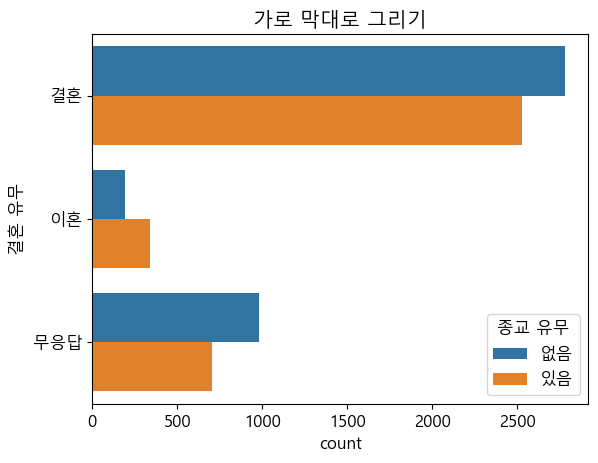

In [25]:
plt.figure()
plt.title('가로 막대로 그리기')
sns.countplot(y = '결혼 유무', hue = '종교 유무', data = welfare, order = ORDERING)
FileSave()

seabornWelfare_05.png파일이 저장되었습니다.


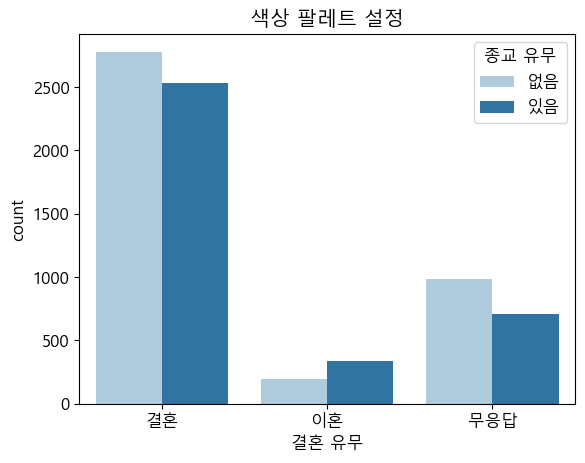

In [26]:
plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(x = '결혼 유무', hue = '종교 유무', palette = 'Paired', data = welfare, order = ORDERING)
FileSave()

C:\Users\KH302\AppData\Local\Temp\ipykernel_11128\3690294931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug = True, hist = False, kde = True)


seabornWelfare_06.png파일이 저장되었습니다.


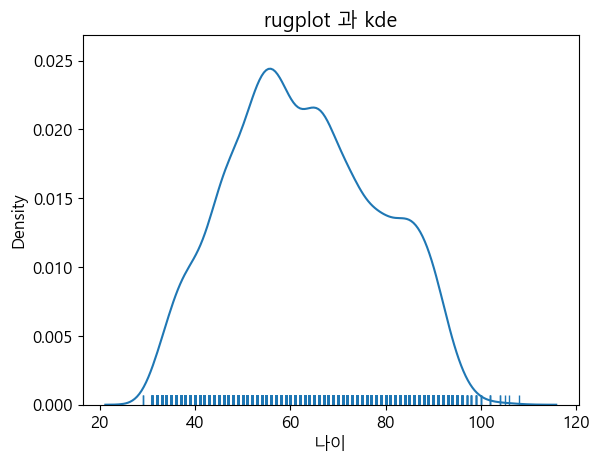

In [27]:
x = welfare['나이']

plt.figure()
plt.title('rugplot 과 kde')
sns.distplot(x, rug = True, hist = False, kde = True)
FileSave()

C:\Users\KH302\AppData\Local\Temp\ipykernel_11128\599817279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug = False, hist = True, kde = True, label = 'asdf')


seabornWelfare_07.png파일이 저장되었습니다.


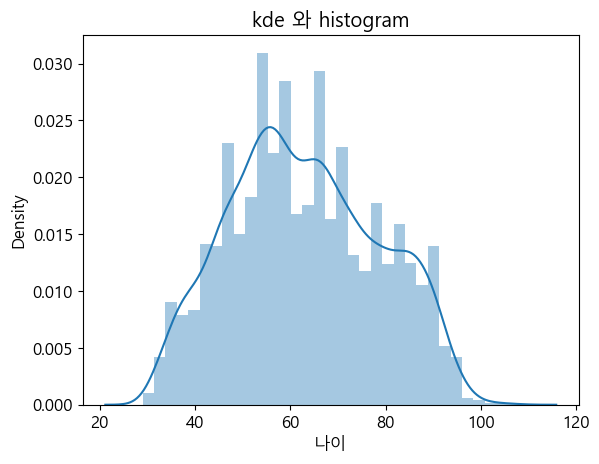

In [28]:
plt.figure()
plt.title('kde 와 histogram')
sns.distplot(x, rug = False, hist = True, kde = True, label = 'asdf')
FileSave()

C:\Users\KH302\AppData\Local\Temp\ipykernel_11128\218675775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, vertical = True)


seabornWelfare_08.png파일이 저장되었습니다.


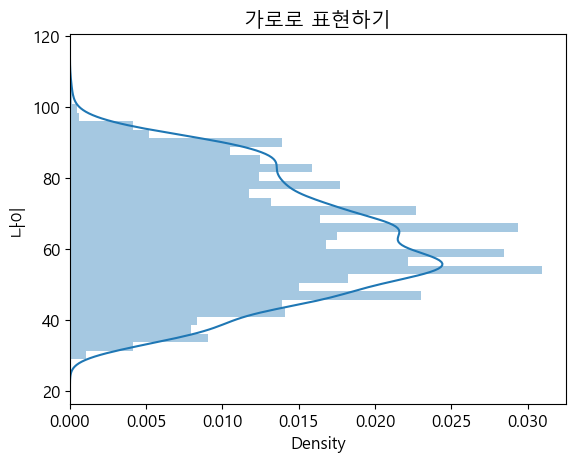

In [29]:
plt.figure()
plt.title('가로로 표현하기')
sns.distplot(x, vertical = True)
FileSave()

C:\Users\KH302\AppData\Local\Temp\ipykernel_11128\814207562.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'm')


seabornWelfare_09.png파일이 저장되었습니다.


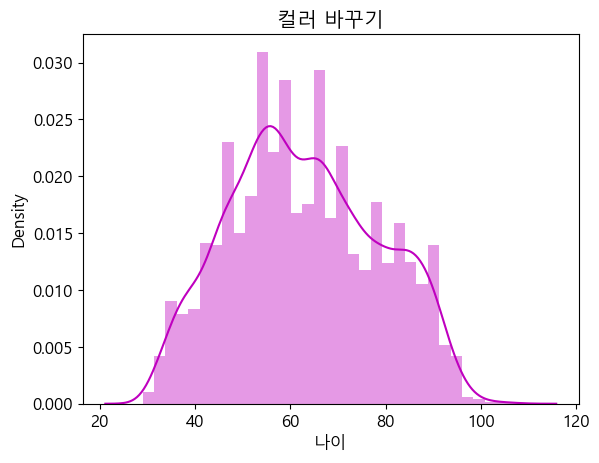

In [30]:
plt.figure()
plt.title('컬러 바꾸기')
sns.distplot(x, color = 'm')
FileSave()

In [31]:
pivot = welfare.pivot_table(index = '성별', columns = '결혼 유무', values = '나이')
pivot

결혼 유무,결혼,무응답,이혼
성별,,,
남성,65.806978,50.897321,80.000000
여성,64.890179,48.011349,81.567164


seabornWelfare_10.png파일이 저장되었습니다.


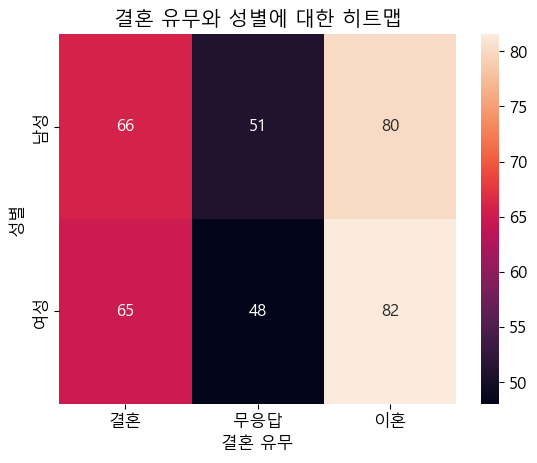

In [32]:
plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data = pivot, annot = True)
FileSave()

In [36]:
cor = welfare.corr(numeric_only = True)
cor

,생일,직업 코드,소득,나이
생일,1.000000,-0.287829,0.093783,-1.000000
직업 코드,-0.287829,1.000000,-0.287414,0.287829
소득,0.093783,-0.287414,1.000000,-0.093783
나이,-1.000000,0.287829,-0.093783,1.000000


seabornWelfare_11.png파일이 저장되었습니다.


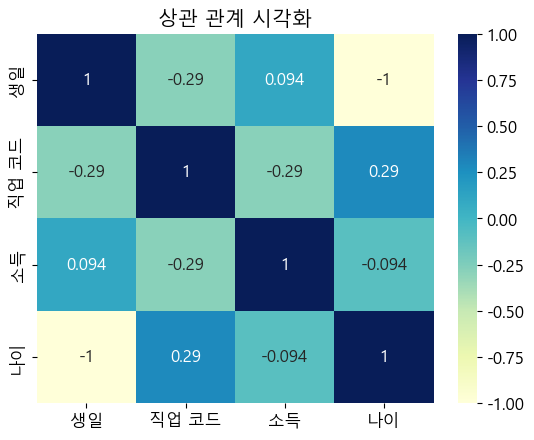

In [37]:
plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data = cor, annot = True, cmap = 'YlGnBu')
FileSave()

seabornWelfare_13.png파일이 저장되었습니다.


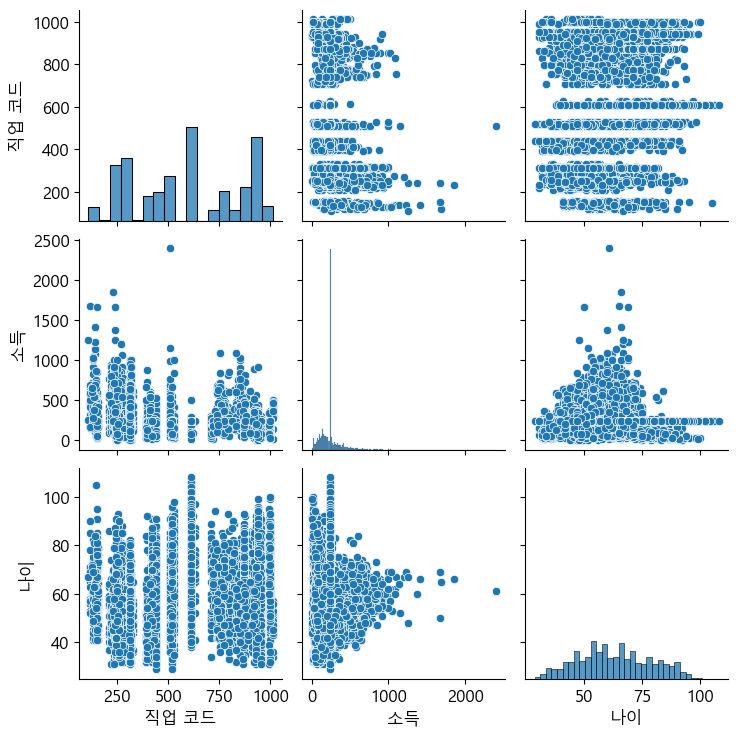

In [39]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

# plt.figure()
# plt.title('기본 pairplot')
sns.pairplot(data = newwelfare)
FileSave()

seabornWelfare_14.png파일이 저장되었습니다.


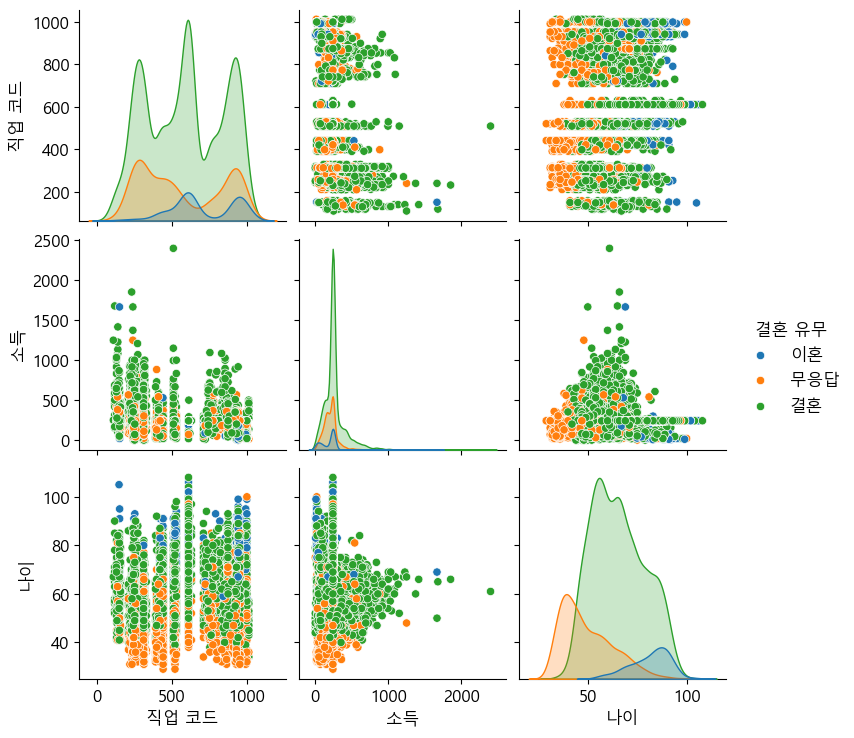

In [40]:
sns.pairplot(data = newwelfare, hue = '결혼 유무')
FileSave()

seabornWelfare_15.png파일이 저장되었습니다.


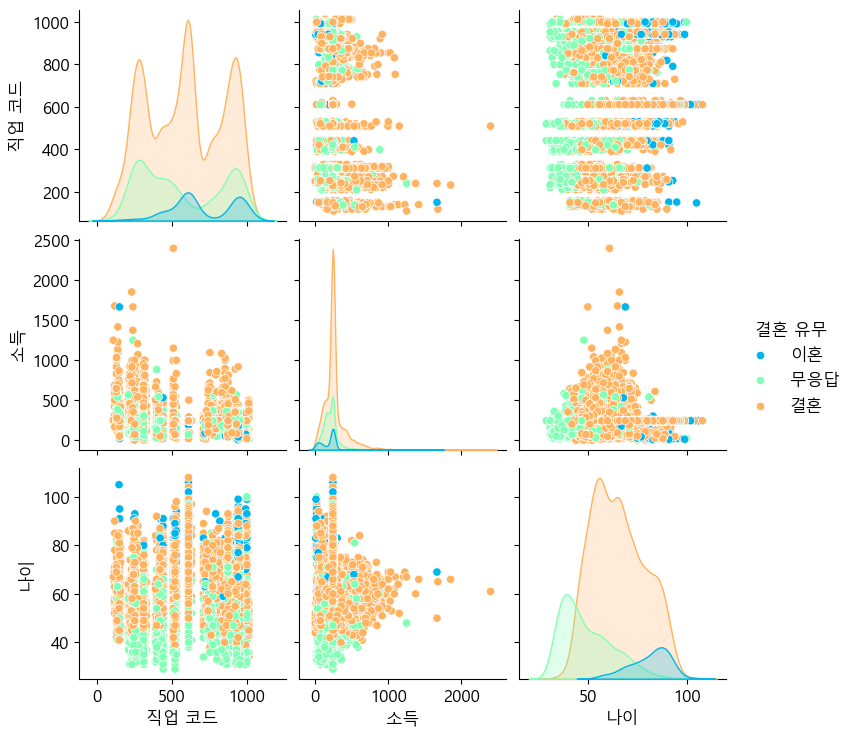

In [41]:
sns.pairplot(data = newwelfare, hue = '결혼 유무', palette = 'rainbow')
FileSave()

seabornWelfare_16.png파일이 저장되었습니다.


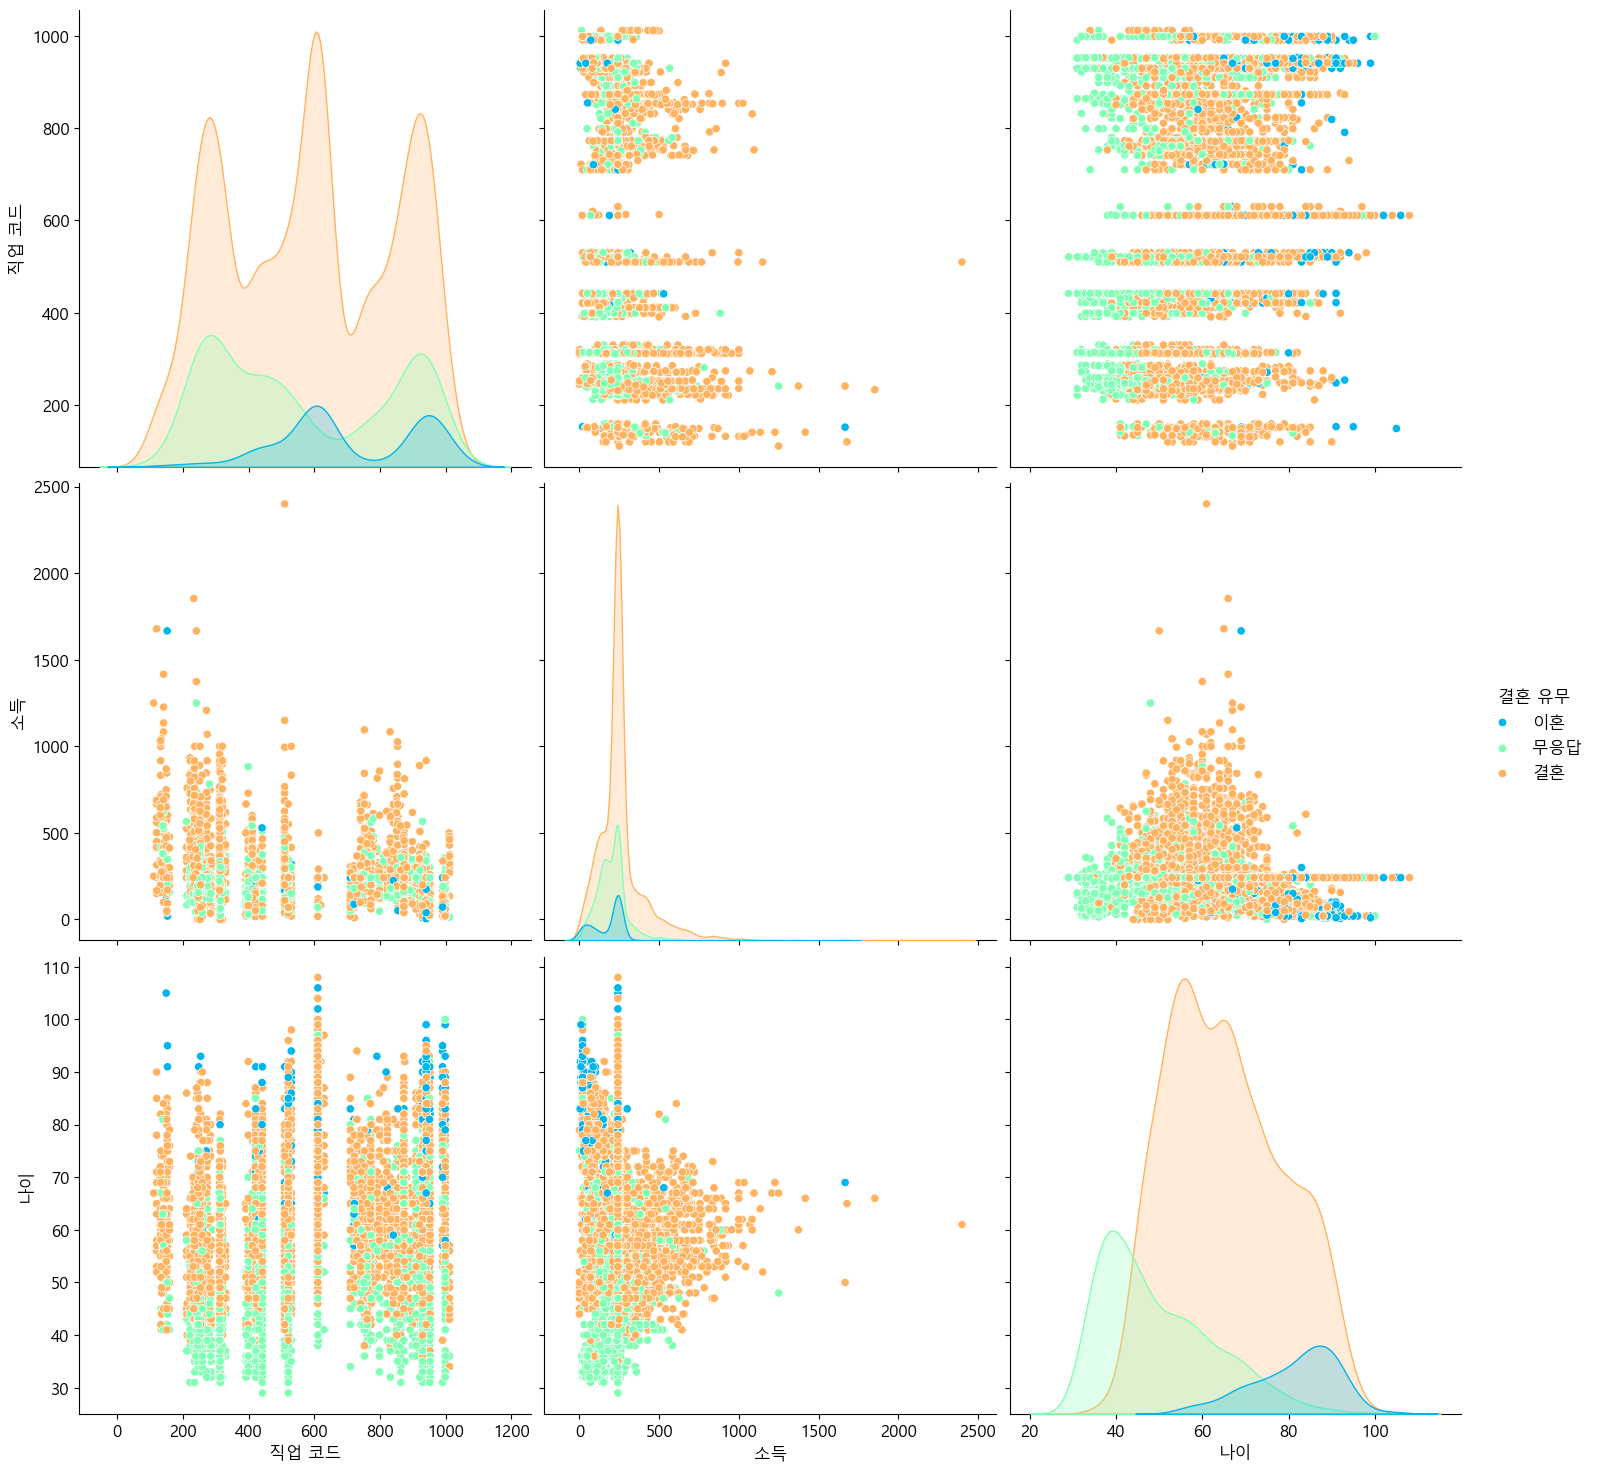

In [42]:
sns.pairplot(data = newwelfare, hue = '결혼 유무', palette = 'rainbow', height = 5, )
FileSave()

In [43]:
welfare['나이'].describe()

count    7529.000000
mean       62.987913
std        15.524029
min        29.000000
25%        51.000000
50%        62.000000
75%        75.000000
max       108.000000
Name: 나이, dtype: float64

seabornWelfare_18.png파일이 저장되었습니다.


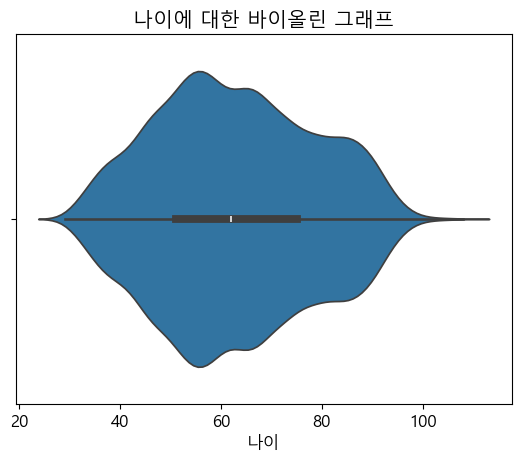

In [45]:
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x = '나이', data = welfare)
FileSave()

seabornWelfare_19.png파일이 저장되었습니다.


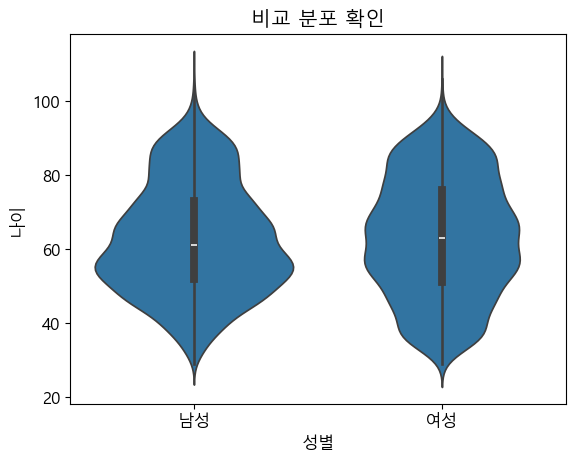

In [46]:
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x = '성별', y = '나이', data = welfare)
FileSave()

seabornWelfare_20.png파일이 저장되었습니다.


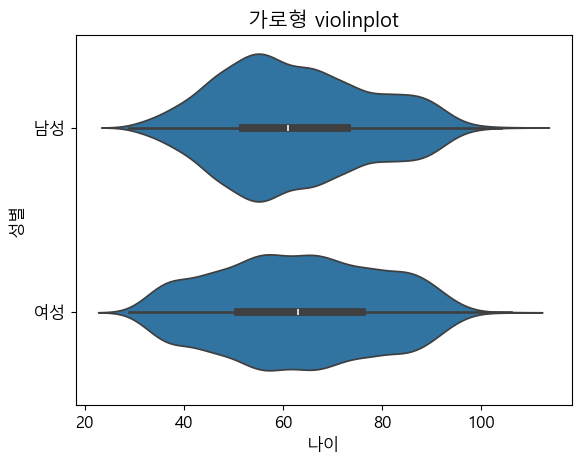

In [47]:
plt.figure()
plt.title('가로형 violinplot')
sns.violinplot(y = '성별', x = '나이', data = welfare)
FileSave()

seabornWelfare_21.png파일이 저장되었습니다.


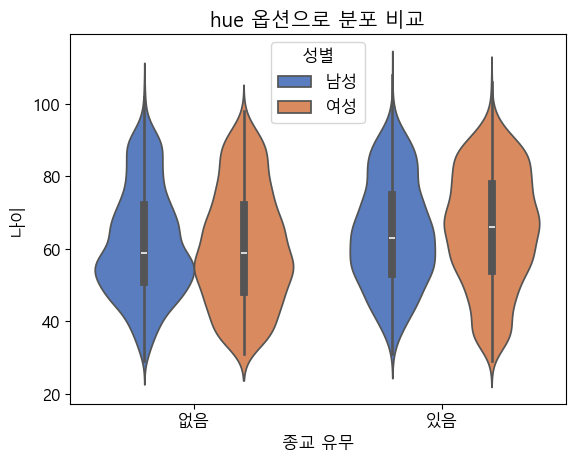

In [48]:
plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x = '종교 유무', y = '나이', hue = '성별', data = welfare, palette = 'muted')
FileSave()

seabornWelfare_23.png파일이 저장되었습니다.


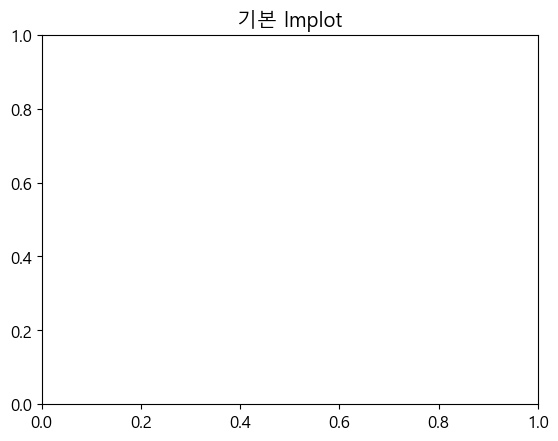

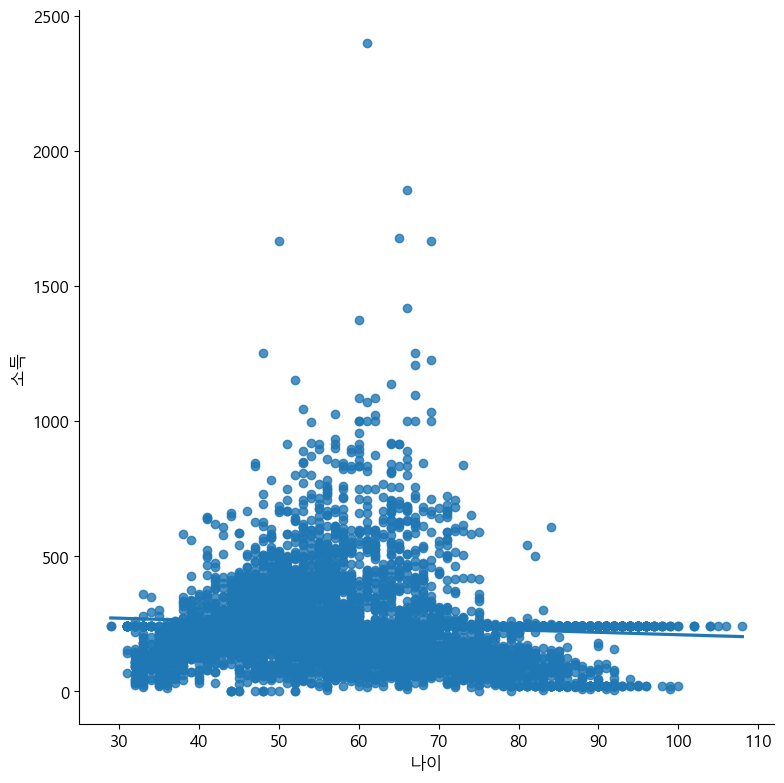

In [50]:
plt.figure()
plt.title('기본 lmplot')
sns.lmplot(x = '나이', y = '소득', height = 8, data = welfare)
FileSave()

seabornWelfare_25.png파일이 저장되었습니다.


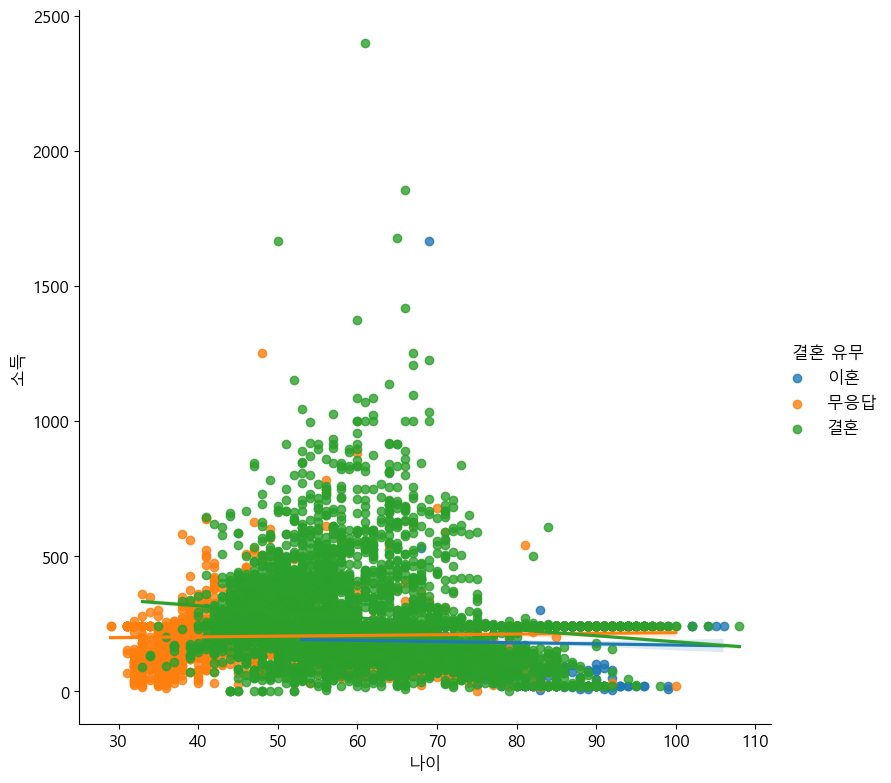

In [52]:
sns.lmplot(x = '나이', y = '소득', hue = '결혼 유무', height = 8, data = welfare)
FileSave()

seabornWelfare_26.png파일이 저장되었습니다.


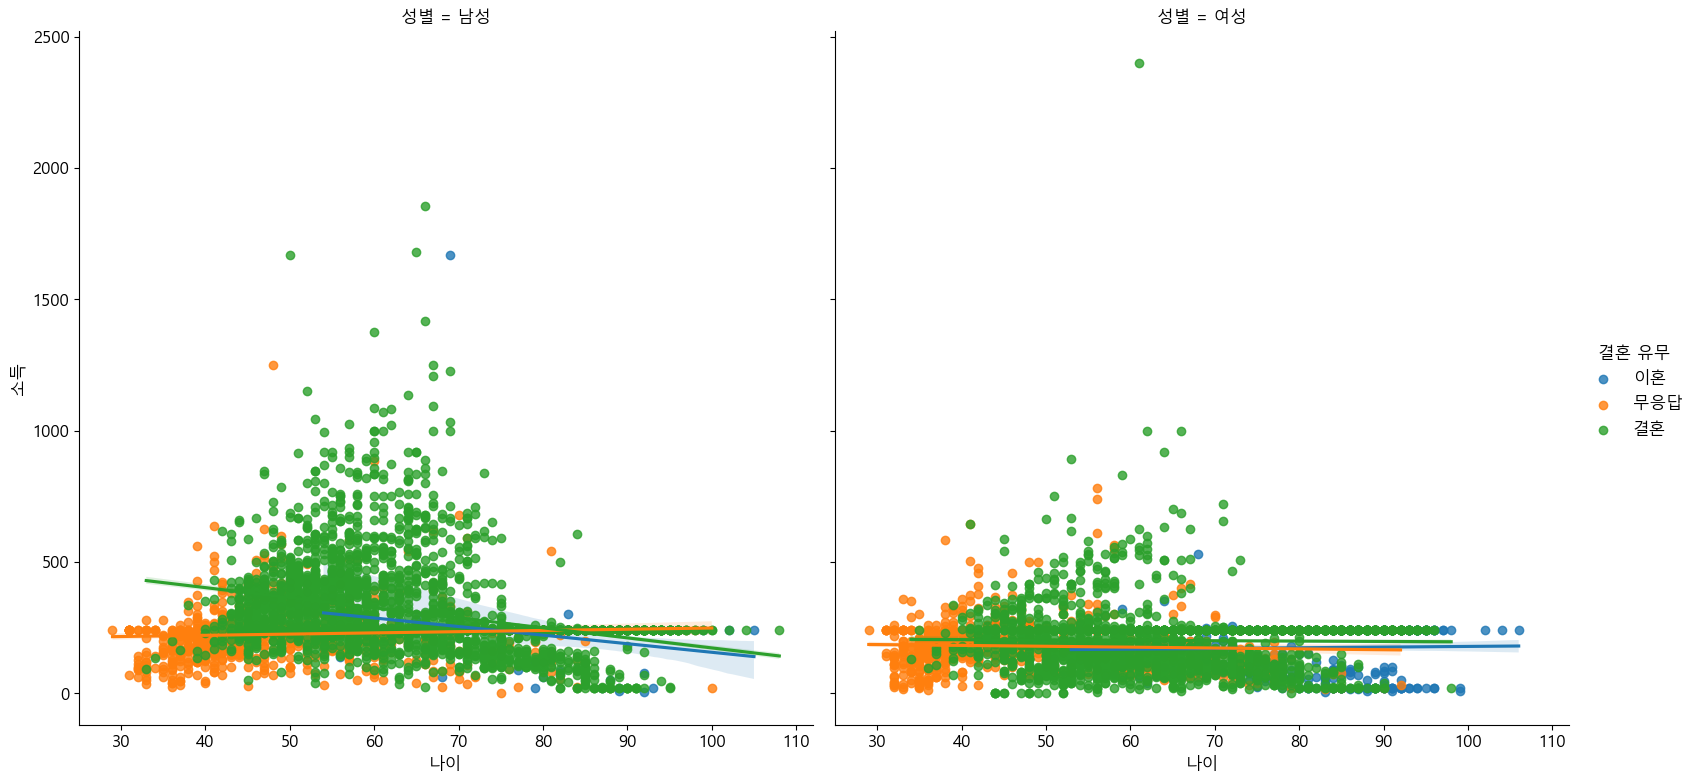

In [53]:
sns.lmplot(x = '나이', y = '소득', hue = '결혼 유무', col = '성별', col_wrap = 2, height = 8, data = welfare)
FileSave()

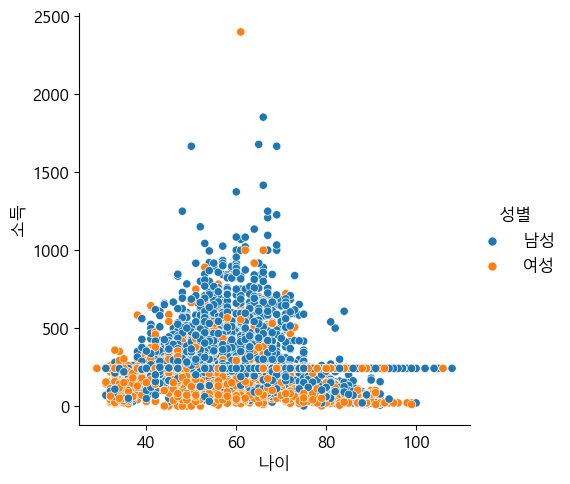

In [55]:
sns.relplot(x = '나이', y = '소득', hue = '성별', data = welfare)

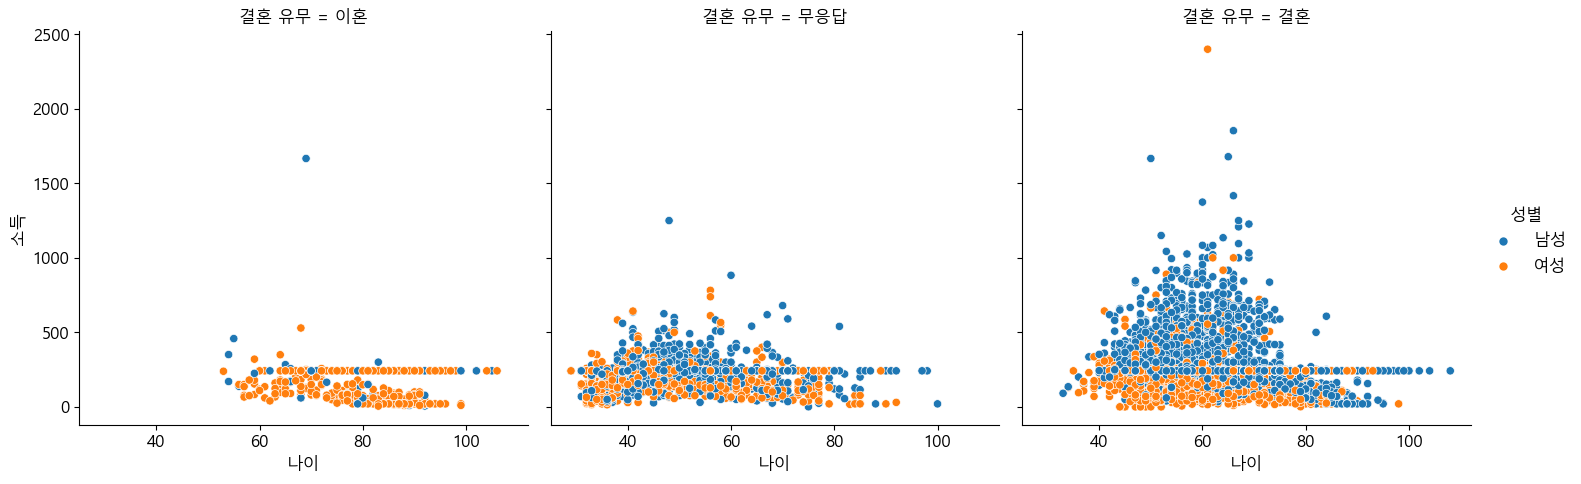

In [56]:
sns.relplot(x = '나이', y = '소득', hue = '성별', col = '결혼 유무', data = welfare)

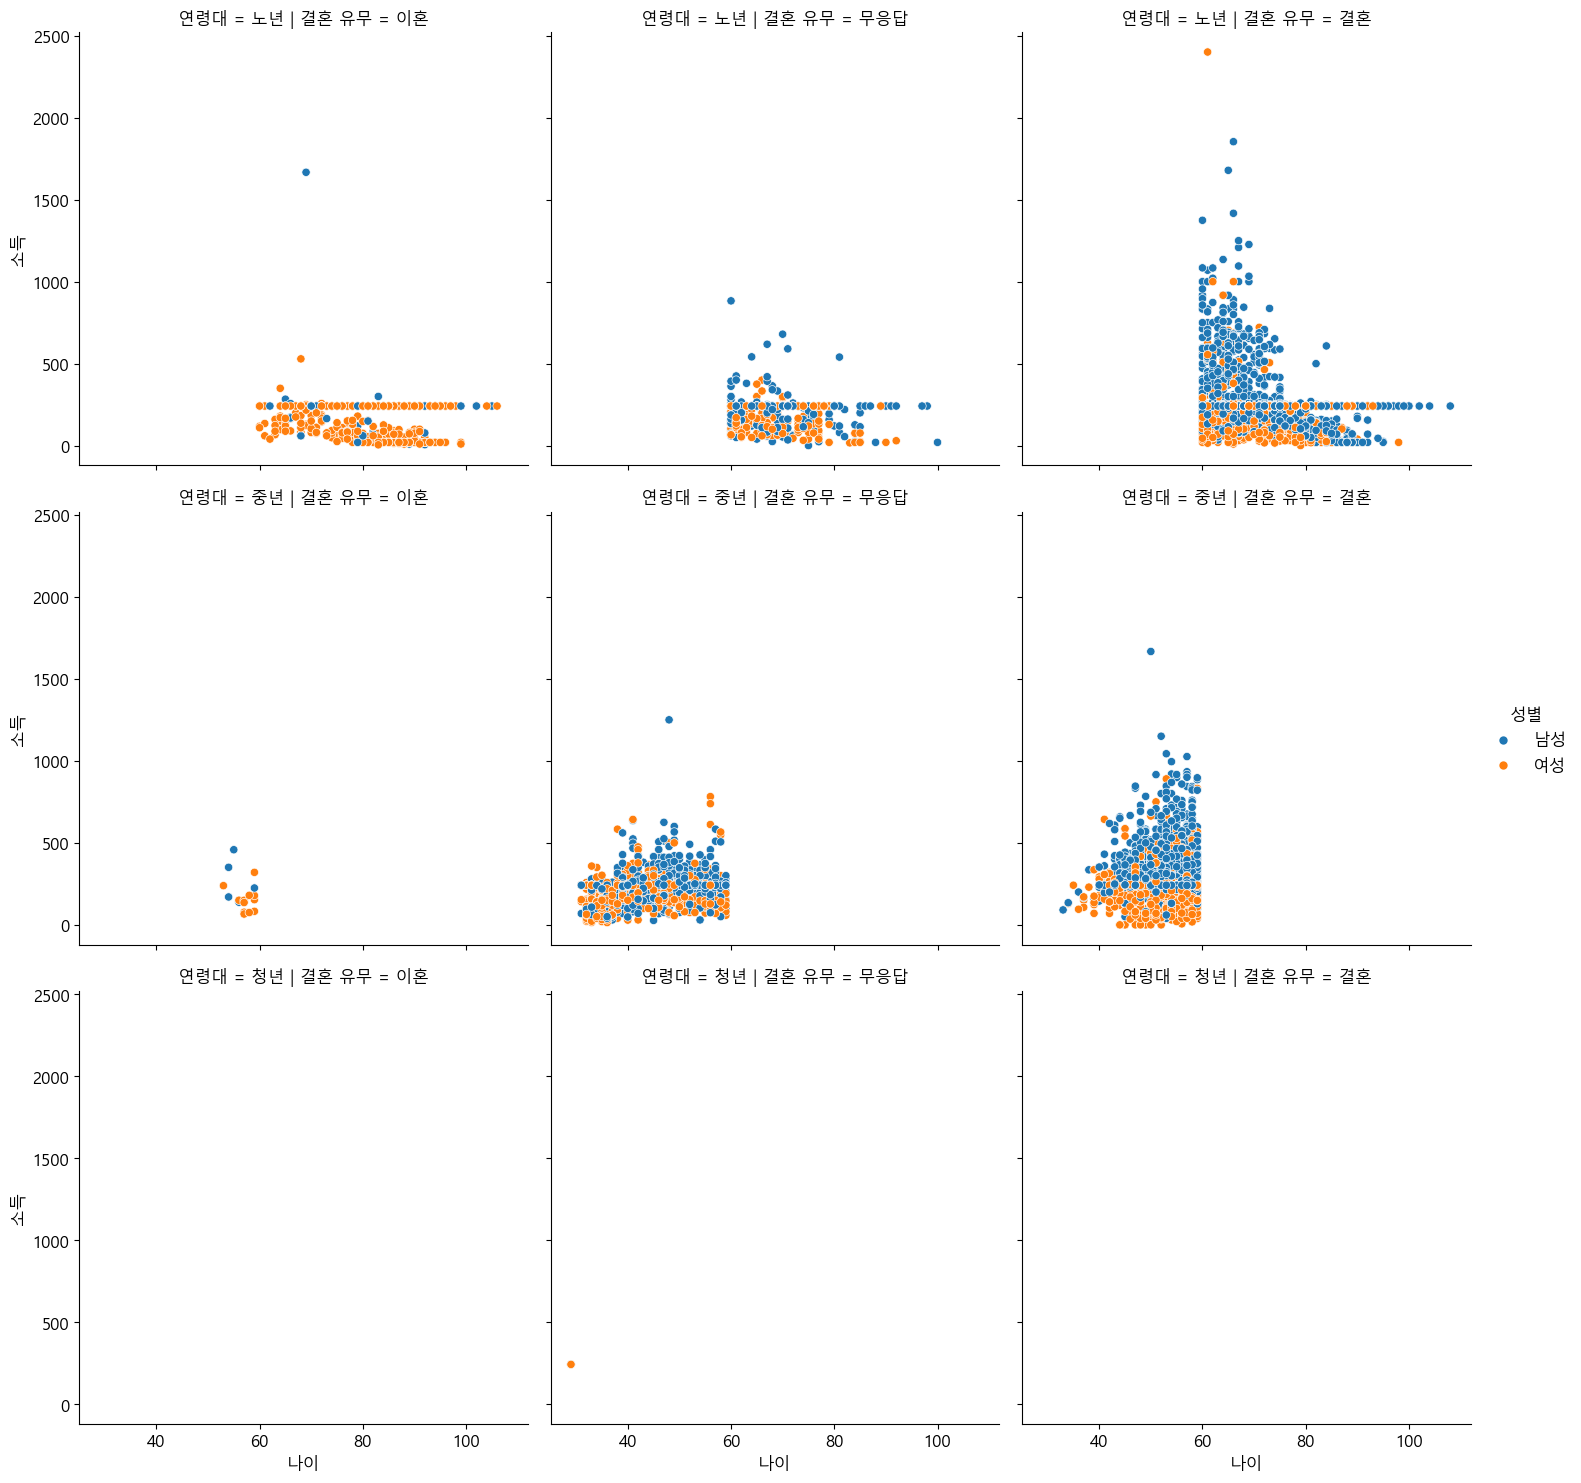

In [57]:
sns.relplot(x = '나이', y = '소득', hue = '성별', row = '연령대', col = '결혼 유무', data = welfare)

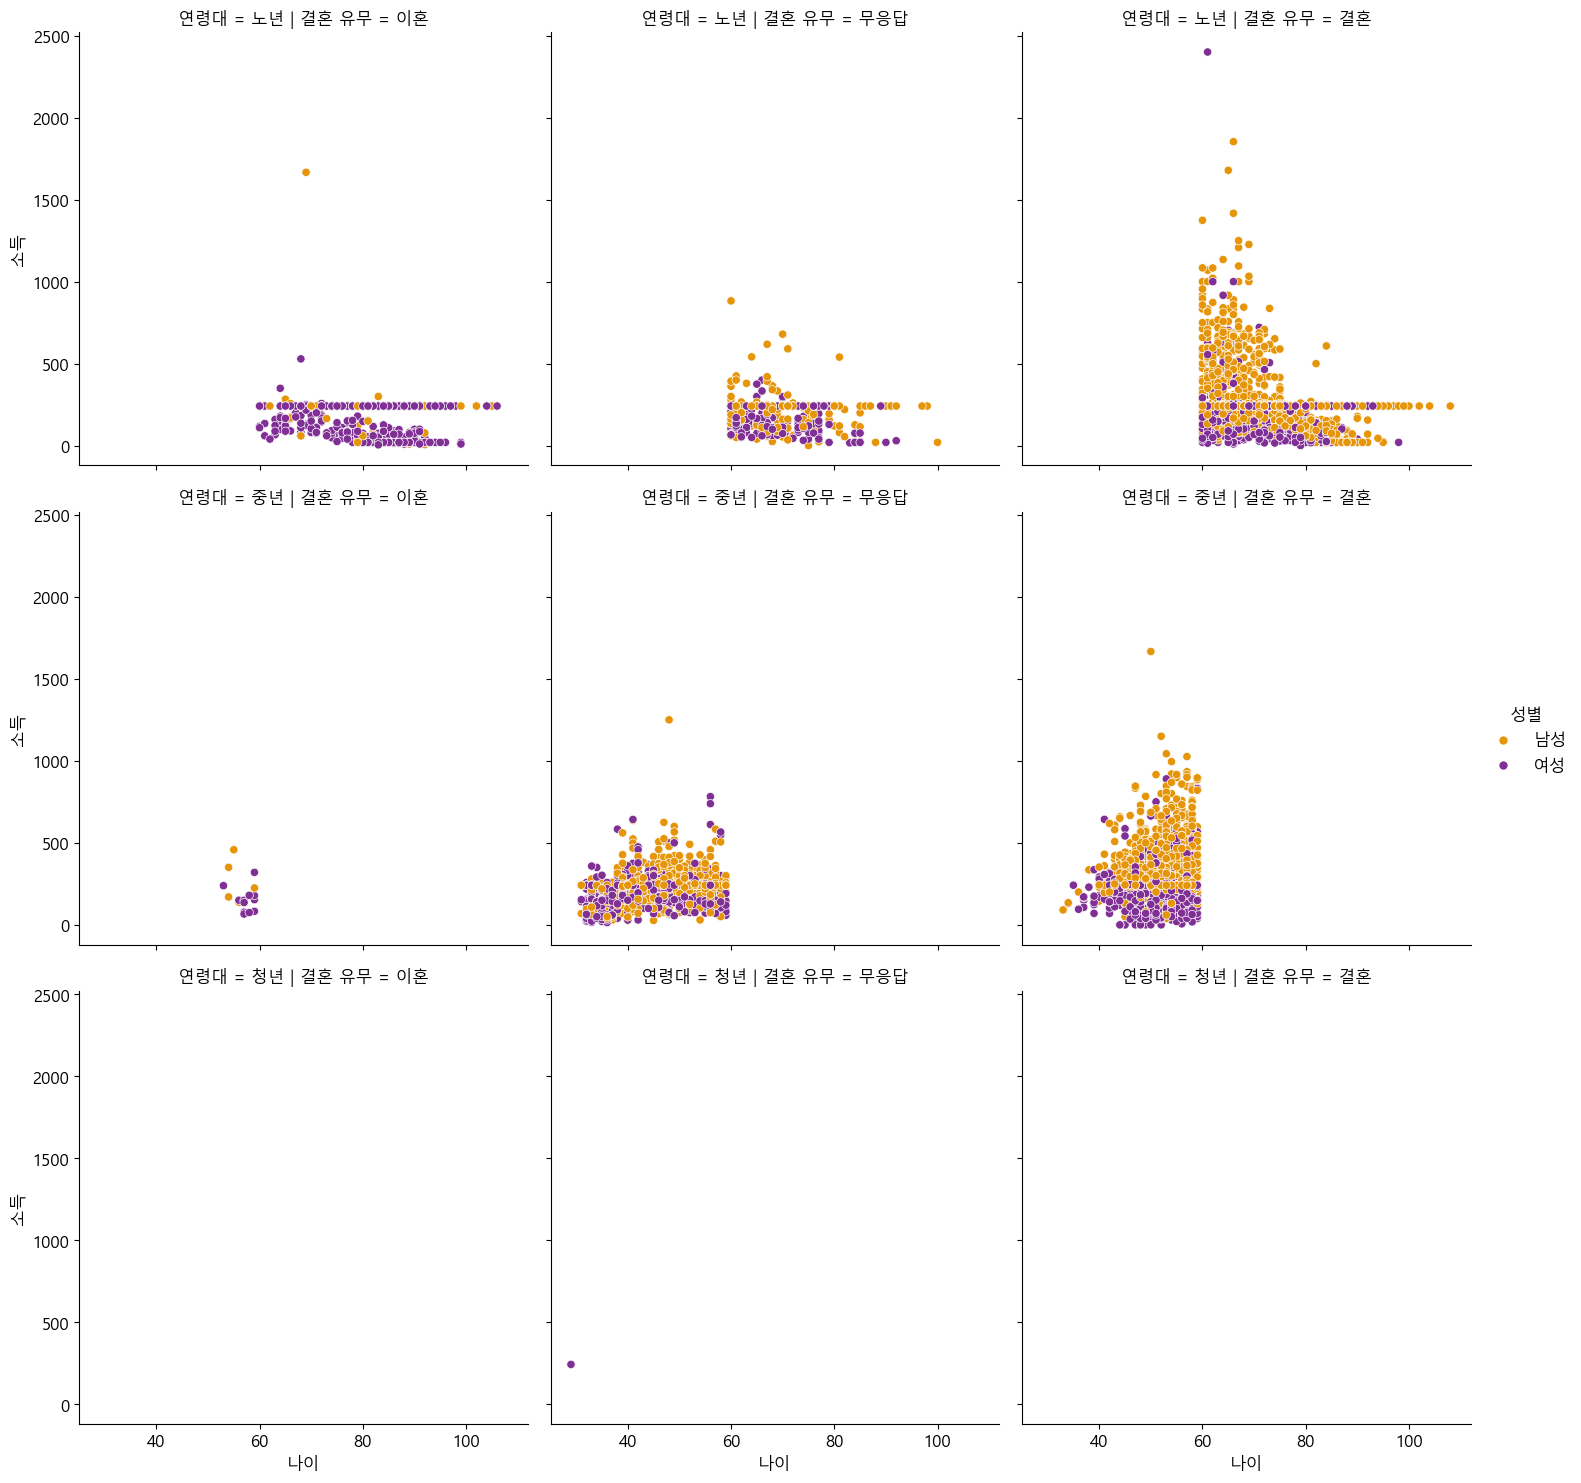

In [58]:
sns.relplot(x = '나이', y = '소득', hue = '성별', row = '연령대', col = '결혼 유무', palette = 'CMRmap_r', data = welfare)

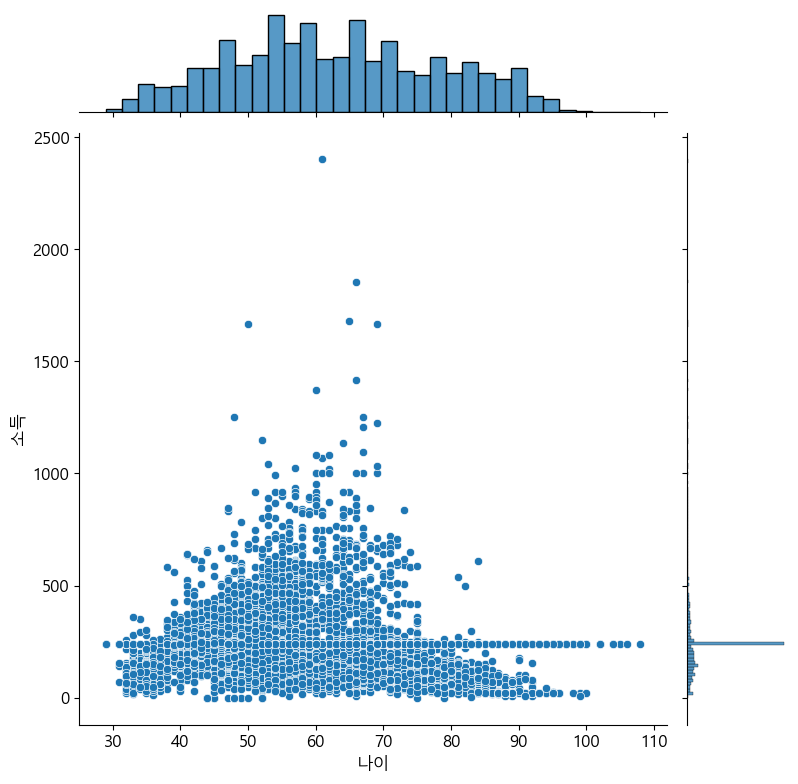

In [60]:
sns.jointplot(x = '나이', y = '소득', height = 8, data = welfare)

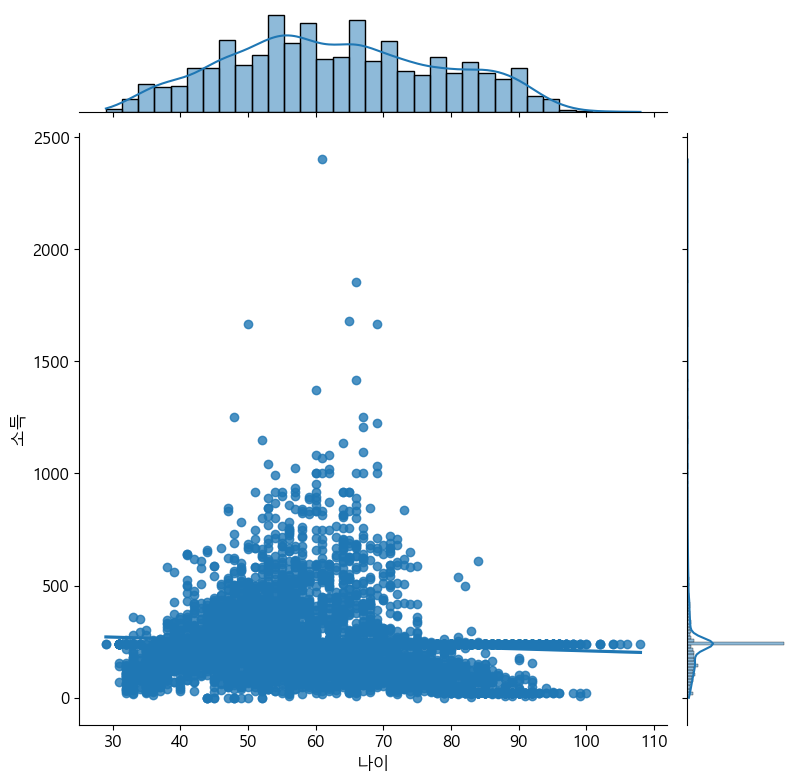

In [61]:
sns.jointplot(x = '나이', y = '소득', height = 8, data = welfare, kind = 'reg')

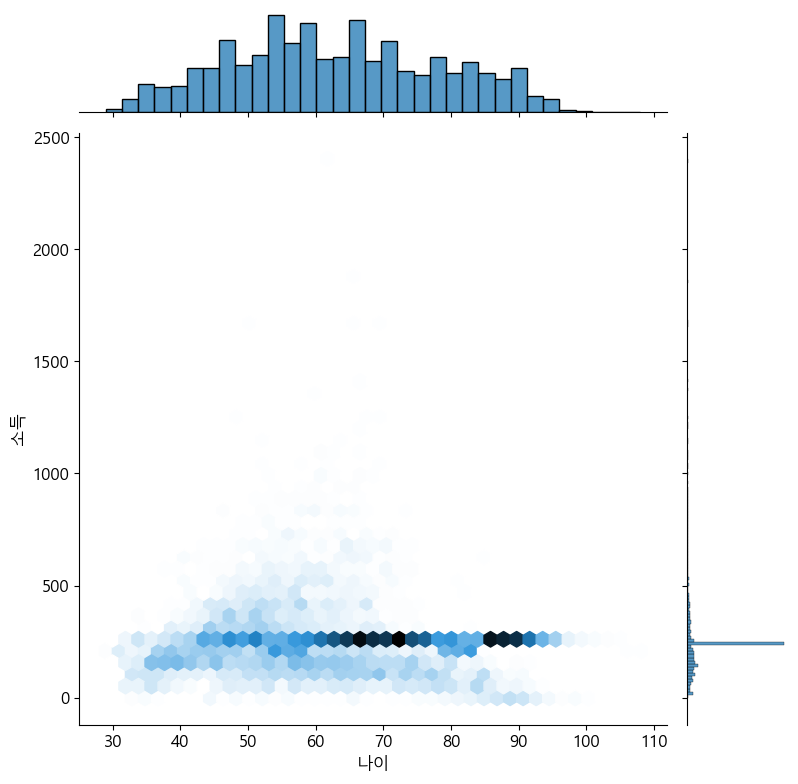

In [62]:
sns.jointplot(x = '나이', y = '소득', height = 8, data = welfare, kind = 'hex')

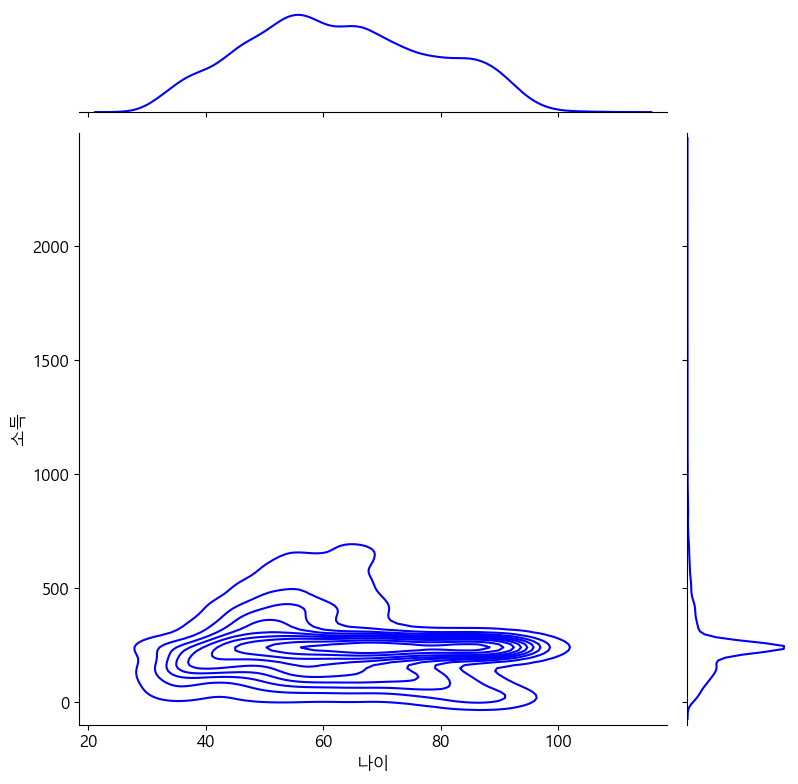

In [63]:
sns.jointplot(x = '나이', y = '소득', height = 8, data = welfare, kind = 'kde', color = 'b')

Text(0, 0.5, '소득')

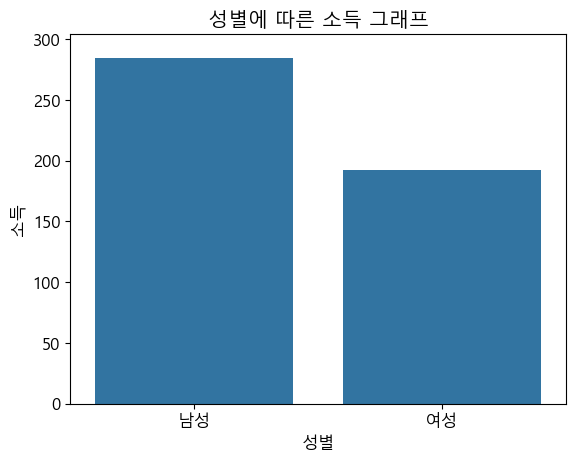

In [64]:
ax = plt.subplots()
ax = sns.barplot(x = '성별', y = '소득', data = welfare, errwidth = 0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

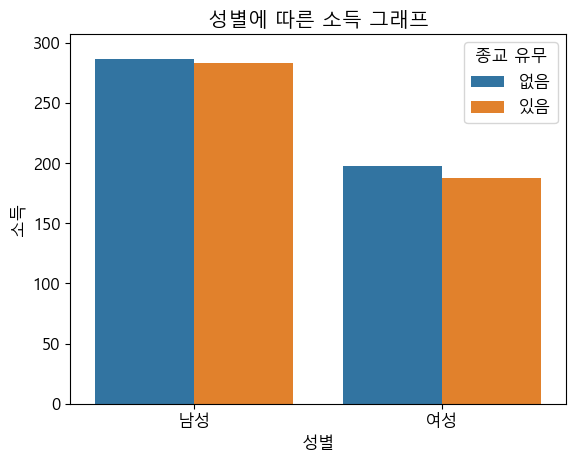

In [65]:
ax = plt.subplots()
ax = sns.barplot(x = '성별', y = '소득', hue = '종교 유무', data = welfare, errwidth = 0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

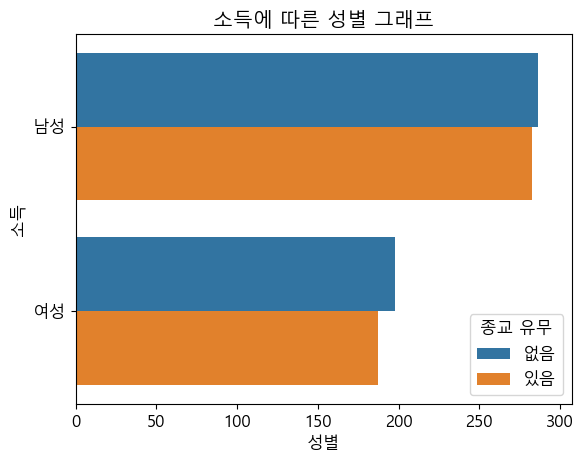

In [66]:
ax = plt.subplots()
ax = sns.barplot(x = '소득', y = '성별', hue = '종교 유무', data = welfare, errwidth = 0)
ax.set_title('소득에 따른 성별 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

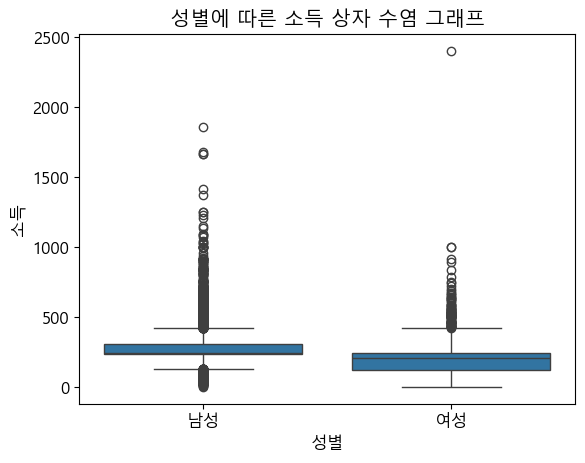

In [67]:
ax = plt.subplots()
ax = sns.boxplot(x = '성별', y = '소득', data = welfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

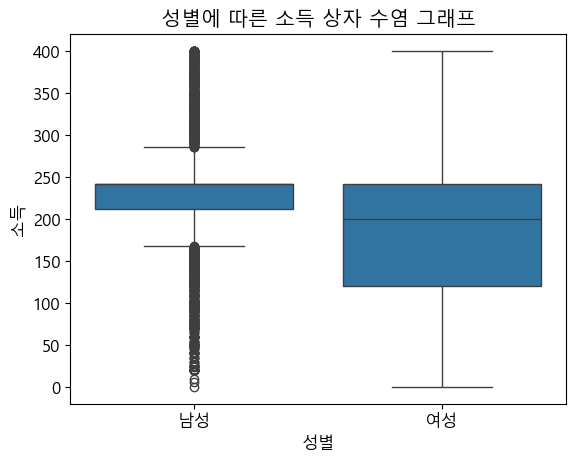

In [68]:
newwelfare = welfare.loc[welfare['소득'] <= 400]
ax = plt.subplots()
ax = sns.boxplot(x = '성별', y = '소득', data = newwelfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '나이')

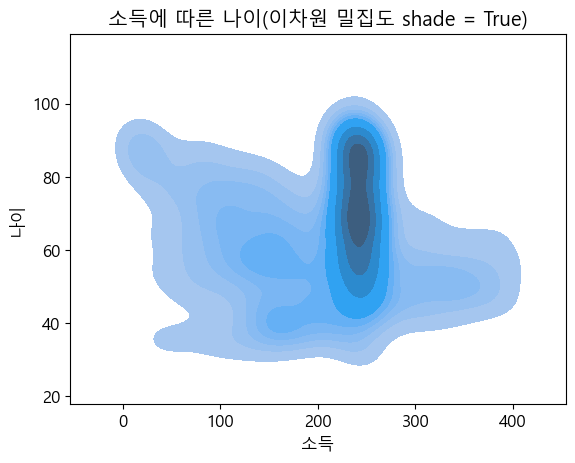

In [73]:
kde, ax = plt.subplots()
sns.kdeplot(data = newwelfare, x = '소득', y = '나이', fill = True)
ax.set_title('소득에 따른 나이(이차원 밀집도 shade = True)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')

Text(0, 0.5, '나이')

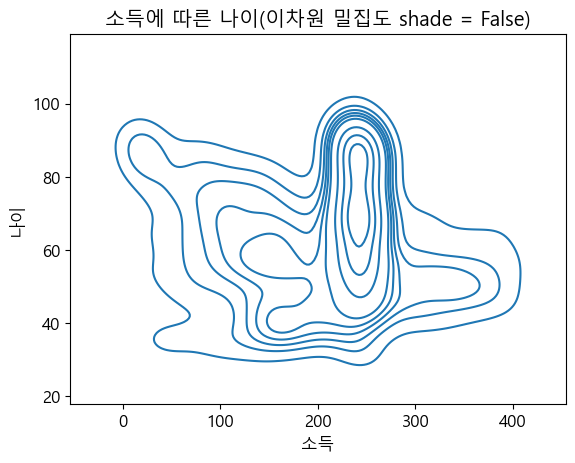

In [74]:
kde, ax = plt.subplots()
ax = sns.kdeplot(newwelfare, x = '소득', y = '나이', fill = False)
ax.set_title('소득에 따른 나이(이차원 밀집도 shade = False)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')